In [1]:
%reset -f

In [2]:
import pandas as pd
import numpy as np

In [5]:
pokemon_stat = pd.read_csv('pokemon_use.csv',index_col=0)
combats=pd.read_csv('combats.csv')

In [6]:
#pokemon_stat.columns

In [7]:
pokemon_stat.drop(['Type 1','Type 2','Generation'],axis=1,inplace=True)
#pokemon_stat

In [8]:
# Change combats dataframe to: First win 0, Second win 1
combats.Winner[combats.Winner == combats.First_pokemon] = 0
combats.Winner[combats.Winner == combats.Second_pokemon] = 1
#combats.Winner

In [7]:
stats = ["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed","Legendary"]
temp_list=[]
stats_df=pokemon_stat[stats].T.to_dict("list")
one=combats.First_pokemon.map(stats_df)
two=combats.Second_pokemon.map(stats_df)  

In [10]:
for i in range(len(one)):
    first = np.array(one[i][0:7])
    second = np.array(two[i][0:7])
        # Calculate the difference
    if combats.Winner[i] == 0:
        temp_list.append(((first-second).tolist()))
    else:
        temp_list.append(((second-first).tolist()))
data = pd.DataFrame(temp_list, columns=["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed","Legendary"]) 

Text(0.5,1,'Histogram of HP difference')

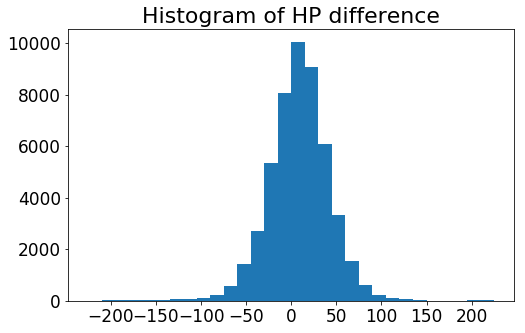

In [89]:
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(data['HP'], 30)
plt.xticks(range(-200,210,50))
plt.tick_params(labelsize=17)
plt.title("Histogram of HP difference",fontsize=22) 

Text(0.5,1,'Histogram of Attack difference')

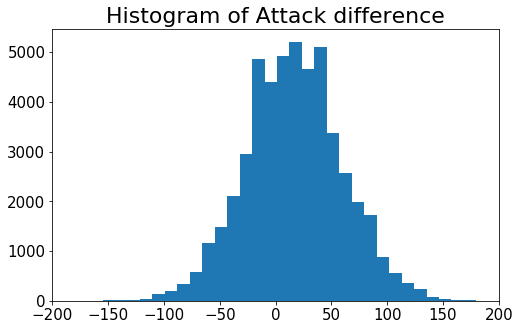

In [90]:
plt.figure(figsize=(8, 5))
plt.hist(data['Attack'], 30)
plt.xticks(range(-200,210,50))
plt.tick_params(labelsize=15)
plt.title("Histogram of Attack difference",fontsize=22) 

Text(0.5,1,'Histogram of Defense difference')

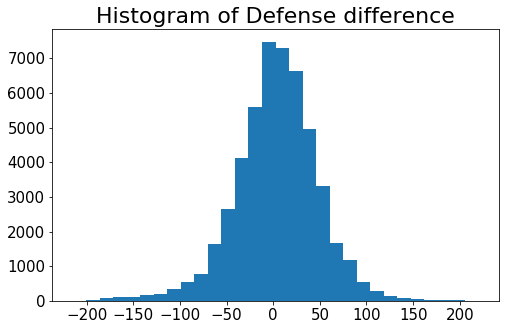

In [91]:
plt.figure(figsize=(8, 5))
plt.hist(data["Defense"], 30)
plt.xticks(range(-200,210,50))
plt.tick_params(labelsize=15)
plt.title("Histogram of Defense difference",fontsize=22) 

Text(0.5,1,'Histogram of Sp. Atk difference')

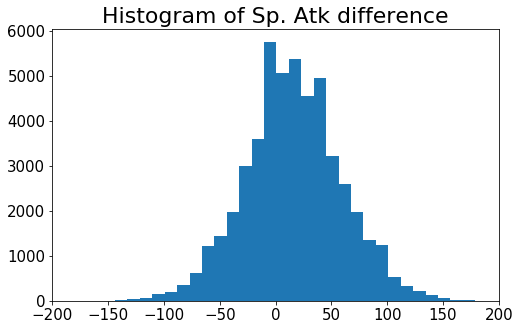

In [96]:
plt.figure(figsize=(8, 5))
plt.hist(data['Sp. Atk'], 30)
plt.xticks(range(-200,210,50))
plt.tick_params(labelsize=15)
plt.title("Histogram of Sp. Atk difference",fontsize=22) 

Text(0.5,1,'Histogram of Sp. Def difference')

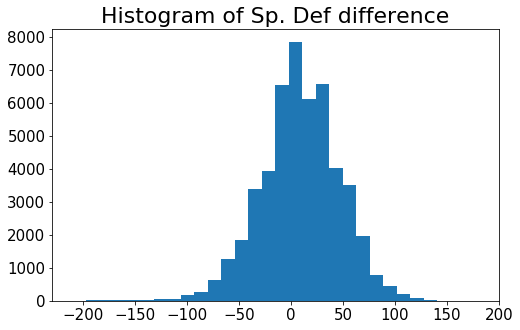

In [93]:
plt.figure(figsize=(8, 5))
plt.hist(data['Sp. Def'], 30)
plt.xticks(range(-200,210,50))
plt.tick_params(labelsize=15)
plt.title("Histogram of Sp. Def difference",fontsize=22) 

Text(0.5,1,'Histogram of Speed difference')

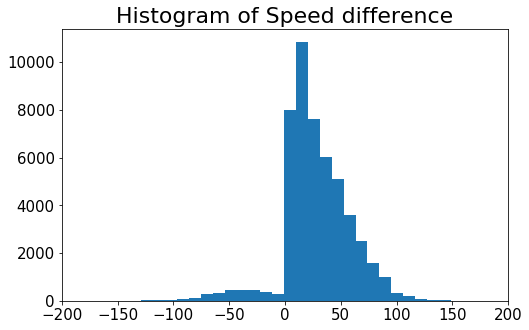

In [94]:
plt.figure(figsize=(8, 5))
plt.hist(data['Speed'], 30)
plt.xticks(range(-200,210,50))
plt.tick_params(labelsize=15)
plt.title("Histogram of Speed difference",fontsize=22) 

ValueError: max must be larger than min in range parameter.

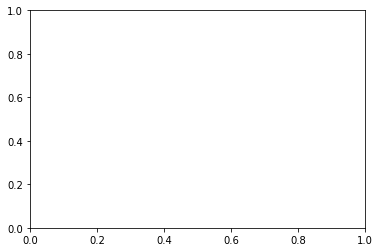

In [51]:
plt.hist(data['Legendary'])

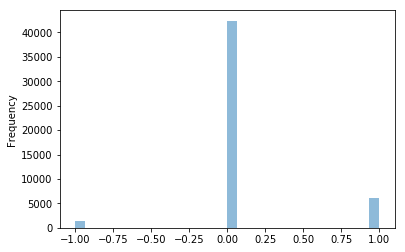

In [28]:
ax = data['Legendary'].plot.hist(bins=30, alpha=0.5)

In [ ]:
# separate to x and y
x_label=data.drop("Winner",axis=1)
y_label=data["Winner"]

x_label=x_label.values
y_laebl=y_label.values

In [ ]:
# split train/test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.20, random_state=10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

In [ ]:
# For test CV grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# n_estimators = range(100,550,50)
n_estimators = [300]
# n_estimators = range(20,100,10)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True,refit=True)
#estimator,param_grid, verbose 是GridSearchCV（）的参数，param_grid=hyper负责把先前设置的参数传给RandomForestClassifier()
X = x_train
y = y_train
model = gd.fit(X,y)
print(gd.best_score_)#输出最高的准确率
print(gd.best_estimator_)#输出最好的学习器，包括一系列参数
#得到最优参数后，再重新训练一次

In [ ]:
# 得到最优参数之后保存模型在这里写
# TODO:记录最优参数的数值，保存模型到一个文件中
# TODO：添加几行代码，直接读取模型文件，以便下一步求accuracy
# TODO
# gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True,refit=True)
# refit = True 
# gd返回最优参数训练的模型存入model中 model = gd.fit(X,y)

In [ ]:
# check on test set
pred = model.predict(x_test)
print('Accuracy of ', accuracy_score(pred, y_test)*100)

In [ ]:
# try to predict
# try_data=pd.read_csv('try.csv')

In [ ]:
# 此处只是可视化
# new_try_data=try_data[["First_pokemon","Second_pokemon"]].replace(pokemon_stat.Name)
# new_try_data.head()

In [ ]:
# final_try_data = preprocess(pokemon_stat, try_data)
# pred=model.predict(final_try_data)
# try_data["Winner"]=[try_data["First_pokemon"][i] if pred[i]==0 else try_data["Second_pokemon"][i] for i in range(len(pred))]

In [ ]:
# cols = ["First_pokemon","Second_pokemon","Winner"]
# combats_name = try_data[cols].replace(pokemon_stat.Name)
# combats_name[200:208]